In [2]:
import datetime

import numpy as np
import pandas as pd
import tensorflow.compat.v1 as tf
import cv2 
tf.disable_v2_behavior()

from matplotlib import pyplot as plt 



2021-11-06 13:16:38.646921: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/cv2/../../lib64:
2021-11-06 13:16:38.647005: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


Instructions for updating:
non-resource variables are not supported in the long term


In [3]:
TRAIN_DATA_PATH = "data/Q1_train.csv"
TEST_DATA_PATH = "data/Q1_test.csv"

SIZE_IN_ROW = 28
VALIDATION_PERCNTAGE = 0.2

LABELS = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',10:'K',11:'L',
          12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',
          19:'T',20:'U',21:'V',22:'W',23:'X',24:'Y'}


WIDTH = 28
HEIGHT = 28

In [4]:
all_data = pd.read_csv(TRAIN_DATA_PATH,index_col=False)
test_data = pd.read_csv(TEST_DATA_PATH,index_col=False)

In [5]:
all_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
test_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [7]:
def disp_images(data):
    fig, axes = plt.subplots(5, 5)
    fig.subplots_adjust(hspace = 0.5, wspace = 0.5)
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i][1:].reshape(28, 28), cmap = 'binary')
        ax.set_xlabel(LABELS[data[i][0]])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.gcf().set_facecolor("white")
    plt.show()
    
    

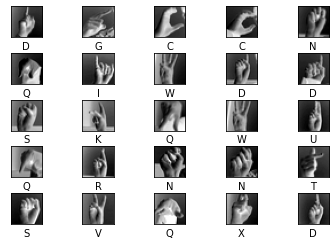

In [8]:
disp_images(all_data.iloc[0:25].values)

In [9]:
## random shuffling first time
all_data = all_data.sample(frac=1).reset_index(drop=True)
test_data = test_data.sample(frac=1).reset_index(drop=True)

## Train and Validation splitting

after one random shuffling , split train and validation data from all data

In [10]:
data_length = all_data.shape[0]
test_data_length = test_data.shape[0]
print("all train + validate data lengths: " + str(data_length))
validation_data_length = int(data_length * VALIDATION_PERCNTAGE)
train_data_length = data_length - validation_data_length

print("train data lengths: " + str(train_data_length) +
      "\r\nvalidate data lengths : " + str(validation_data_length))

all train + validate data lengths: 27455
train data lengths: 21964
validate data lengths : 5491


In [11]:
y_labels = all_data['label']
all_data = all_data.drop('label',1)

y_test_labels = test_data['label']
test_data = test_data.drop('label',1)


/tmp/ipykernel_21140/1524214916.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  all_data = all_data.drop('label',1)
/tmp/ipykernel_21140/1524214916.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test_data = test_data.drop('label',1)


In [12]:
## DATA normalization and encoding Y

x_train = 2 * (all_data.copy().values[:train_data_length].astype(np.float32)/255 - 0.5)
_y_train = y_labels.copy()[:train_data_length]

x_valid = 2 * (all_data.copy().values[train_data_length:].astype(np.float32)/255 - 0.5)
_y_valid = y_labels.copy().values[train_data_length:]


y_train =  tf.Session().run(tf.one_hot(_y_train,25))
y_valid =  tf.Session().run(tf.one_hot(_y_valid,25))

x_test = 2 * (test_data.copy().values.astype(np.float32)/255 - 0.5)
y_test = tf.Session().run(tf.one_hot(y_test_labels.values,25))

print(x_train)
print(x_valid)
print(x_test)

[[ 0.23921573  0.30196083  0.37254906 ...  0.00392163 -0.00392157
   0.02745104]
 [-0.18431371 -0.12156862 -0.09803921 ... -0.27058822 -0.26274508
  -0.26274508]
 [-0.5137255  -0.47450978 -0.41960782 ...  0.5372549   0.5529412
   0.54509807]
 ...
 [-0.52156866 -0.5058824  -0.49019605 ...  0.64705884  0.654902
   0.654902  ]
 [ 0.16078436  0.18431377  0.21568632 ...  0.6156863   0.6
   0.58431375]
 [ 0.5058824   0.49803925  0.49803925 ...  0.5921569   0.56078434
   0.54509807]]
[[-0.49019605 -0.27058822 -0.34117645 ...  0.427451    0.45098042
   0.4666667 ]
 [ 0.09019613  0.09019613  0.09019613 ...  0.06666672  0.05098045
   0.04313731]
 [ 0.43529415  0.4431373   0.43529415 ...  0.45098042  0.43529415
   0.30980396]
 ...
 [-0.4980392  -0.49019605 -0.47450978 ... -0.1372549  -0.2235294
  -0.3490196 ]
 [-0.96862745 -0.5686275  -0.36470586 ... -0.09803921  0.79607844
   0.6313726 ]
 [ 0.12941182  0.15294123  0.1686275  ...  0.5058824   0.49803925
   0.4901961 ]]
[[-0.32549018 -0.23921567 -

2021-11-06 13:16:55.488025: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-11-06 13:16:55.488068: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mohy): /proc/driver/nvidia/version does not exist
2021-11-06 13:16:55.488732: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [13]:
## HYPER PARAMS
adam_learning_rate = 0.001
sgd_learning_rate = 0.1

batch_size = 1024
n_inputs = x_train.shape[1]
n_outputs = 25
layers_num = [n_inputs,256,256,n_outputs] ## hidden layers

In [14]:
def batch_all_data(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)


def batch_batch_data(data,labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [20]:
def train_task(summary_path,train_data,validate_data,batch_size,loss,accuracy,
               training_op,epoches,train_tensorboard,merged_tensorboard,X,Y):
    loss_buffer = []
    acc_buffer = []
    saver = tf.train.Saver()
    
    with tf.Session() as sess:
        write = tf.summary.FileWriter(summary_path, sess.graph)

        sess.run(tf.global_variables_initializer())
        for epoch in range(0,epoches):
            train_phase = True

            for i in range(int(train_data_length/batch_size)):
                
                input_shuffle, output_shuffle = batch_batch_data(train_data[0][i*batch_size : (i+1)*batch_size],
                                                                 train_data[1][i*batch_size : (i+1)*batch_size])
                f = { X: input_shuffle, Y: output_shuffle }
                
                _, train_val = sess.run([training_op, train_tensorboard],feed_dict=f)
                
                write.add_summary(train_val,epoch * int(train_data_length/batch_size) + i)

              # print('iter {}: \t Loss={:.2f}'.format(i,sess.run(loss,feed_dict=f)))

            f_valid={X:validate_data[0], Y:validate_data[1]}
            train_phase = False

            val,ls,acc = sess.run([merged_tensorboard,loss,accuracy], feed_dict=f_valid)
            write.add_summary(val,epoch)
            # write.add_summary(acc,epoch)
            if epoch%25 == 0:
                print('--------------------------------------------------')
                print('Epoch:{} \t Validation Loss:{:.2f} , acc: {:.2f}'.format(epoch,ls,acc))
                print('--------------------------------------------------')
            loss_buffer.append(ls)
            acc_buffer.append(acc)
        
        train_phase = False
        ls,acc = sess.run([loss,accuracy],feed_dict={X:x_test,Y:y_test})
        print('--------------------------------------------------')
        print('final \t test Loss:{:.2f} , acc: {:.2f}'.format(ls,acc))
        print('--------------------------------------------------')
        save_path = saver.save(sess, summary_path.replace("summary","model"))
        print("Model saved in path: %s" % save_path)
        return loss_buffer,acc_buffer



In [21]:
def neural_network_simple():
    weights = []
    biases = []
    layers = []


#     layers_num.insert(0,n_inputs)
#     layers_num.append(n_outputs)

    tf.reset_default_graph()

    # tf.summary.FileWriter('./graphs', tf.get_default_graph())


    X = tf.placeholder('float', [None, n_inputs])
    Y = tf.placeholder('float', [None, n_outputs])

    histogram_tensorboard = []

    print(layers_num)
    for i in range(len(layers_num)-1):
        weights.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i],layers_num[i+1]),name="W_{}".format(i),
                                       initializer=tf.keras.initializers.glorot_normal()))
        histogram_tensorboard.append(tf.summary.histogram("W_{}".format(i), weights[i]))

        biases.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i+1]) , name="B_{}".format(i),
                                      initializer=tf.zeros_initializer()))
        histogram_tensorboard.append(tf.summary.histogram("B_{}".format(i), biases[i]))

    # histogram_merged = tf.summary.merge(histogram_tensorboard)

    print(weights)
    print(biases)
    middle = len(layers_num) - 3
    
    layers.append(tf.nn.relu(tf.add(tf.matmul(X, weights[0]), biases[0])))
    for i in range(middle):
        layers.append(tf.nn.relu(tf.add(tf.matmul(layers[i], weights[i+1]), biases[i+1])))

    layers.append(tf.matmul(layers[middle], weights[middle+1]) + biases[middle+1])
    # layers.append(tf.matmul(layers[2], weights[3]))

    print(layers)
    return layers[-1],X,Y,histogram_tensorboard

In [22]:
def loss_accuracy_op(logits,labels,optimizer,opt_options={"learning_rate":0.001}):
    loss= tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits= logits,
                                            name='LOSS'))
    
    _optimizer = optimizer(learning_rate = opt_options["learning_rate"])
    training_op = _optimizer.minimize(loss)
    correct_pred = tf.equal(tf.argmax(logits, 1), tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
    return (loss,accuracy,training_op)


def prediction(logits,sess,X,x):
    train_phase = False
    indexes = sess.run(tf.argmax(logits, 1), feed_dict={X:x})
    conf = np.take(sess.run(tf.nn.softmax(logits), feed_dict={X:x}),indexes,axis=1)
    train_phase = True
    return indexes, conf



In [23]:
def tensorboard_creator(loss,accuracy,histogram):
    
    loss_tensorboard=tf.summary.scalar('Validation_Loss', loss)
    acc_tensorboard=tf.summary.scalar('Validation_Accuracy', accuracy)
    
    train_tensorboard=tf.summary.scalar('Training_Loss', loss)

    merged = tf.summary.merge([loss_tensorboard,acc_tensorboard] + histogram)
    return merged, train_tensorboard

In [24]:
timestamp = datetime.datetime.now().replace(microsecond=0).isoformat()
logits, input_data, out, histogram_tensorboard = neural_network_simple()
SGD_loss,SGD_accuracy,SGD_training_op = loss_accuracy_op(logits,out,tf.train.GradientDescentOptimizer,{"learning_rate":sgd_learning_rate})
SGD_merged,SGD_train_tensorboard = tensorboard_creator(SGD_loss,SGD_accuracy,histogram_tensorboard)
ls_sgd, acc_sgd = train_task("./summary/SGD/simple/{}".format(timestamp),(x_train,y_train),(x_valid,y_valid),batch_size,
           SGD_loss,SGD_accuracy,SGD_training_op,30,SGD_train_tensorboard,SGD_merged, input_data, out);

logits, input_data, out, histogram_tensorboard = neural_network_simple()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
Adam_merged,Adam_train_tensorboard = tensorboard_creator(Adam_loss, Adam_accuracy, histogram_tensorboard)
ls_adam, acc_adam = train_task("./summary/Adam/simple/{}".format(timestamp),(x_train,y_train),(x_valid,y_valid),batch_size,
           Adam_loss,Adam_accuracy,Adam_training_op,30,Adam_train_tensorboard,Adam_merged, input_data, out);

[784, 256, 256, 25]
[<tf.Variable 'W_0:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(256, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_2:0' shape=(25,) dtype=float32_ref>]
[<tf.Tensor 'Relu:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'Relu_1:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'add_2:0' shape=(?, 25) dtype=float32>]
--------------------------------------------------
Epoch:0 	 Validation Loss:2.64 , acc: 0.34
--------------------------------------------------
--------------------------------------------------
Epoch:25 	 Validation Loss:0.12 , acc: 1.00
--------------------------------------------------
--------------------------------------------------
final 	 test Loss:0.79 , acc: 0.76
--------------------------------------------------
Model saved in path: ./model/SGD/simple2021-11-06T13:17:26
[

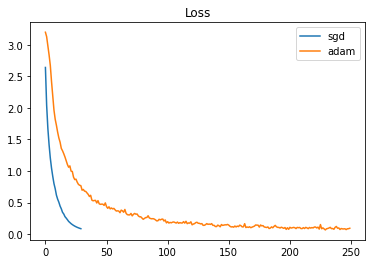

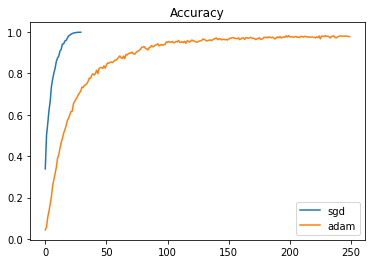

In [100]:
plt.plot(list(range(len(ls_sgd))),ls_sgd,label = "sgd")
plt.plot(list(range(len(ls_adam))),ls_adam,label = "adam")
plt.title("Loss")
plt.legend()
plt.show()

plt.figure()

plt.plot(list(range(len(acc_sgd))),acc_sgd,label = "sgd")
plt.plot(list(range(len(acc_adam))),acc_adam,label = "adam")
plt.title("Accuracy")
plt.legend()
plt.show()

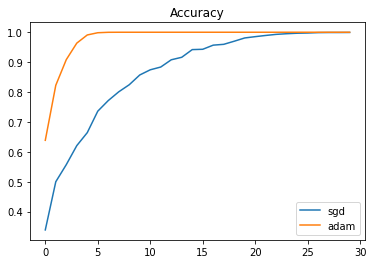

In [106]:
## test of model after save

tf.reset_default_graph()


logits, input_data, out, histogram_tensorboard = neural_network_simple()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
saver = tf.train.Saver()


with tf.Session() as sess:
  # Restore variables from disk.
    saver = tf.trai
    saver.restore(sess, "./model/Adam/simple/{}".format(timestamp))    
    ls,acc = sess.run([Adam_loss,Adam_accuracy],feed_dict={input_data:x_test,out:y_test})
    print(acc,"{:.2f}".format(ls))
#     print(sess.run(tf.keras.utils.normalize(tf.math.confusion_matrix(y_test_labels.values,prediction(logits,sess,input_data,x_test)[0]),axis=1)))
    
    
    

INFO:tensorflow:Restoring parameters from ./model/Adam/dropout2021-11-06T15:38:38


InvalidArgumentError: Restoring from checkpoint failed. This is most likely due to a mismatch between the current graph and the graph from the checkpoint. Please ensure that you have not altered the graph expected based on the checkpoint. Original error:

Assign requires shapes of both tensors to match. lhs shape= [256,25] rhs shape= [256,256]
	 [[node save/Assign_16 (defined at tmp/ipykernel_21140/2069525233.py:12) ]]

Original stack trace for 'save/Assign_16':
  File "usr/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "usr/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/traitlets/config/application.py", line 846, in launch_instance
    app.start()
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 677, in start
    self.io_loop.start()
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 199, in start
    self.asyncio_loop.run_forever()
  File "usr/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
    self._run_once()
  File "usr/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
    handle._run()
  File "usr/lib/python3.8/asyncio/events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
    await self.process_one()
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 446, in process_one
    await dispatch(*args)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
    await result
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
    reply_content = await reply_content
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2901, in run_cell
    result = self._run_cell(
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
    return runner(coro)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3172, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "tmp/ipykernel_21140/2069525233.py", line 12, in <module>
    saver = tf.train.import_meta_graph( "./model/Adam/simple{}.meta".format(timestamp))
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/training/saver.py", line 1465, in import_meta_graph
    return _import_meta_graph_with_return_elements(meta_graph_or_file,
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/training/saver.py", line 1486, in _import_meta_graph_with_return_elements
    meta_graph.import_scoped_meta_graph_with_return_elements(
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/meta_graph.py", line 801, in import_scoped_meta_graph_with_return_elements
    imported_return_elements = importer.import_graph_def(
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py", line 549, in new_func
    return func(*args, **kwargs)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 400, in import_graph_def
    return _import_graph_def_internal(
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 513, in _import_graph_def_internal
    _ProcessNewOps(graph)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/importer.py", line 243, in _ProcessNewOps
    for new_op in graph._add_new_tf_operations(compute_devices=False):  # pylint: disable=protected-access
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3711, in _add_new_tf_operations
    new_ops = [
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3712, in <listcomp>
    self._create_op_from_tf_operation(c_op, compute_device=compute_devices)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 3594, in _create_op_from_tf_operation
    ret = Operation(c_op, self)
  File "home/mohy/uni/DeepLearning/HW/HW-01-DL-2021/HW1/venv/lib/python3.8/site-packages/tensorflow/python/framework/ops.py", line 2045, in __init__
    self._traceback = tf_stack.extract_stack_for_node(self._c_op)


In [76]:
import mediapipe as mp
def live(network,model):
    mpHands = mp.solutions.hands
    hands = mpHands.Hands(static_image_mode=False,
                          max_num_hands=1,
                          min_detection_confidence=0.5,
                          min_tracking_confidence=0.5)

    mpDraw = mp.solutions.drawing_utils

    W = 320
    H = 240

    font                   = cv2.FONT_HERSHEY_SIMPLEX
    fontScale              = 0.5
    fontColor              = (255,255,255)
    lineType               = 2

    tf.reset_default_graph()
    logits, input_data, out, histogram_tensorboard = network()

    boundary = 20

    saver = tf.train.Saver()

    with tf.Session().as_default() as sess:
      # Restore variables from disk.
        saver.restore(sess,model)
        cam = cv2.VideoCapture(0)
        print("press ESC to exit")
        try:
            while True:
                ret_val, img = cam.read()
                img = cv2.resize(img, (W,H))        
                results = hands.process(img)

                if results.multi_hand_landmarks:
                    for handLms in results.multi_hand_landmarks:
                        x_max = 0
                        y_max = 0
                        x_min = W
                        y_min = H
                        for id, lm in enumerate(handLms.landmark):
                            #print(id,lm)
                            h, w, c = img.shape
                            cx, cy = int(lm.x *w), int(lm.y*h)
                            #if id ==0:
                            # cv2.circle(img, (cx,cy), 3, (255,0,255), cv2.FILLED)
                            if cx > x_max:
                                x_max = cx
                            if cx < x_min:
                                x_min = cx
                            if cy > y_max:
                                y_max = cy
                            if cy < y_min:
                                y_min = cy
                        frame = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

                        cv2.rectangle(img, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

                        x_min -= boundary
                        y_min -= boundary
                        x_max += boundary
                        y_max += boundary

                        x_min = max(0,x_min)
                        y_min = max(0,y_min)
                        frame = frame[y_min:y_max, x_min:x_max]
                        # cv2.imshow("test", frame)
                        frame = cv2.resize(frame, (WIDTH,HEIGHT))

                        frame = frame.flatten().astype(np.float32)/255
                        pred,conf = prediction(logits,sess,input_data,frame.reshape(-1,n_inputs))

                        if pred[0] != 23: ## 23 means nothing
                            cv2.putText(img,"{}-{:.2f}%".format(LABELS[pred[0]],conf[0][0]), 
                                        (x_max,y_max), 
                                        font, 
                                        fontScale,
                                        fontColor,
                                        lineType)
                            # mpDraw.draw_landmarks(img, handLms, mpHands.HAND_CONNECTIONS)


                cv2.imshow('my webcam', img)


                if cv2.waitKey(1) == 27: 
                    break  # esc to quit
        except Exception as e:
            print(e)
        cam.release()    
        cv2.destroyAllWindows()

In [77]:
live(neural_network_simple, "./model/Adam/simple/{}".format(timestamp))

[784, 256, 256, 25]
[<tf.Variable 'W_0:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(256, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_2:0' shape=(25,) dtype=float32_ref>]
[<tf.Tensor 'Relu:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'Relu_1:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'add_2:0' shape=(?, 25) dtype=float32>]
INFO:tensorflow:Restoring parameters from ./model/Adam/simple2021-11-06T13:17:26
press ESC to exit


In [87]:
## HYPER PARAMS
adam_learning_rate = 0.001

batch_size = 1024
n_inputs = x_train.shape[1]
n_outputs = 25
layers_num = [n_inputs,256,256,256,256,256,256,n_outputs] ## hidden layers

In [88]:
def neural_network_with_dropout():
    weights = []
    biases = []
    layers = []


    tf.reset_default_graph()



    X = tf.placeholder('float', [None, n_inputs])
    Y = tf.placeholder('float', [None, n_outputs])

    histogram_tensorboard = []

    print(layers_num)
    
    for i in range(len(layers_num)-1):
        weights.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i],layers_num[i+1]),name="W_{}".format(i),
                                       initializer=tf.keras.initializers.glorot_normal()))
        histogram_tensorboard.append(tf.summary.histogram("W_{}".format(i), weights[i]))

        biases.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i+1]) , name="B_{}".format(i),
                                      initializer=tf.zeros_initializer()))
        histogram_tensorboard.append(tf.summary.histogram("B_{}".format(i), biases[i]))
    
    
    print(weights)
    print(biases)
    middle = len(layers_num) - 3
    
    layers.append(tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(X, weights[0]), biases[0])), rate = 0.5))
    for i in range(middle):
        layers.append(tf.nn.dropout(tf.nn.relu(tf.add(tf.matmul(layers[i], weights[i+1]), biases[i+1])), rate = 0.5))
    
    layers.append(tf.matmul(layers[middle], weights[middle+1]) + biases[middle+1])
    
    print(layers)
    return layers[-1],X,Y,histogram_tensorboard

In [95]:
do_timestamp = datetime.datetime.now().replace(microsecond=0).isoformat()

logits, input_data, out, histogram_tensorboard = neural_network_with_dropout()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
Adam_merged,Adam_train_tensorboard = tensorboard_creator(Adam_loss, Adam_accuracy, histogram_tensorboard)
ls_adam, acc_adam = train_task("./summary/Adam/dropout/{}".format(do_timestamp),(x_train,y_train),(x_valid,y_valid),batch_size,
           Adam_loss,Adam_accuracy,Adam_training_op,250,Adam_train_tensorboard,Adam_merged, input_data, out);

[784, 256, 256, 256, 256, 256, 256, 25]
[<tf.Variable 'W_0:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_3:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_4:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_5:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_6:0' shape=(256, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_2:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_3:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_4:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_5:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_6:0' shape=(25,) dtype=float32_ref>]
[<tf.Tensor 'dropout/Mul_1:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'dropout_1/Mul_1:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'dropout_2/Mul_1:0' shape=(?, 256) dtype=f

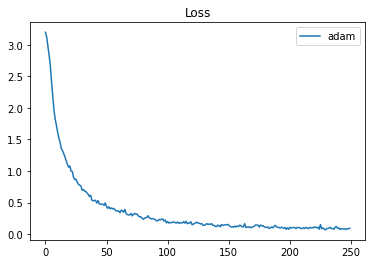

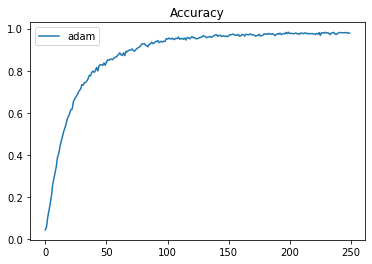

In [96]:
plt.plot(list(range(len(ls_adam))),ls_adam,label = "adam")
plt.title("Loss")
plt.legend()
plt.show()


plt.plot(list(range(len(acc_adam))),acc_adam,label = "adam")
plt.title("Accuracy")
plt.legend()
plt.show()

In [101]:
## test of model after save

tf.reset_default_graph()


logits, input_data, out, histogram_tensorboard = neural_network_simple()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
saver = tf.train.Saver()

with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "./model/Adam/dropout/{}".format(do_timestamp))    
    ls,acc = sess.run([Adam_loss,Adam_accuracy],feed_dict={input_data:x_test,out:y_test})
    print(acc,"{:.2f}".format(ls))
#     print(sess.run(tf.keras.utils.normalize(tf.math.confusion_matrix(y_test_labels.values,prediction(logits,sess,input_data,x_test)[0]),axis=1)))
    
    
    

[784, 256, 256, 256, 256, 256, 256, 25]
[<tf.Variable 'W_0:0' shape=(784, 256) dtype=float32_ref>, <tf.Variable 'W_1:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_2:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_3:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_4:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_5:0' shape=(256, 256) dtype=float32_ref>, <tf.Variable 'W_6:0' shape=(256, 25) dtype=float32_ref>]
[<tf.Variable 'B_0:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_1:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_2:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_3:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_4:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_5:0' shape=(256,) dtype=float32_ref>, <tf.Variable 'B_6:0' shape=(25,) dtype=float32_ref>]
[<tf.Tensor 'Relu:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'Relu_1:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'Relu_2:0' shape=(?, 256) dtype=float32>, <tf.Tensor 'Relu_3

In [ ]:
## HYPER PARAMS
adam_learning_rate = 0.001

batch_size = 1024
n_inputs = x_train.shape[1]
n_outputs = 25
layers_num = [n_inputs,128,128,128,128,128,128,n_outputs] ## hidden layers

train_phase = False

In [ ]:
def neural_network_with_BN():
    weights = []
    biases = []
    layers = []
    normalizations = []

#     layers_num.insert(0,n_inputs)
#     layers_num.append(n_outputs)

    tf.reset_default_graph()

    # tf.summary.FileWriter('./graphs', tf.get_default_graph())


    X = tf.placeholder('float', [None, n_inputs])
    Y = tf.placeholder('float', [None, n_outputs])

    histogram_tensorboard = []

    print(layers_num)
    for i in range(len(layers_num)-1):
        weights.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i],layers_num[i+1]),name="W_{}".format(i),
                                       initializer=tf.keras.initializers.glorot_normal()))
        histogram_tensorboard.append(tf.summary.histogram("W_{}".format(i), weights[i]))
        
        biases.append(tf.get_variable(dtype=tf.float32, shape=(layers_num[i+1]) , name="B_{}".format(i),
                                      initializer=tf.zeros_initializer()))
        histogram_tensorboard.append(tf.summary.histogram("B_{}".format(i), biases[i]))

    # histogram_merged = tf.summary.merge(histogram_tensorboard)

    print(weights)
    print(biases)
    middle = len(layers_num) - 3
    
    layers.append(tf.nn.relu(tf.layers.batch_normalization(tf.add(tf.matmul(X, weights[0]), biases[0]), training = train_phase)))
    
    for i in range(middle):
        layers.append(tf.nn.relu(tf.layers.batch_normalization(tf.add(tf.matmul(layers[i], weights[i+1]), biases[i+1]), training = train_phase)))

    layers.append(tf.matmul(layers[middle], weights[middle+1]) + biases[middle+1])
    # layers.append(tf.matmul(layers[2], weights[3]))

    print(layers)
    return layers[-1],X,Y,histogram_tensorboard

In [ ]:
bn_timestamp = datetime.datetime.now().replace(microsecond=0).isoformat()

logits, input_data, out, histogram_tensorboard = neural_network_with_BN()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
Adam_merged,Adam_train_tensorboard = tensorboard_creator(Adam_loss, Adam_accuracy, histogram_tensorboard)
ls_adam, acc_adam = train_task("./summary/Adam/batchnomral/{}".format(bn_timestamp),(x_train,y_train),(x_valid,y_valid),batch_size,
           Adam_loss,Adam_accuracy,Adam_training_op,76,Adam_train_tensorboard,Adam_merged, input_data, out);

In [ ]:
plt.plot(list(range(len(ls_adam))),ls_adam,label = "adam")
plt.title("Loss")
plt.legend()
plt.show()


plt.plot(list(range(len(acc_adam))),acc_adam,label = "adam")
plt.title("Accuracy")
plt.legend()
plt.show()


In [ ]:
## test of model after save

tf.reset_default_graph()


logits, input_data, out, histogram_tensorboard = neural_network_simple()
Adam_loss,Adam_accuracy,Adam_training_op = loss_accuracy_op(logits, out, tf.train.AdamOptimizer, {"learning_rate":adam_learning_rate})
saver = tf.train.Saver()

with tf.Session() as sess:
  # Restore variables from disk.
    saver.restore(sess, "./model/Adam/batchnormal/{}".format(bn_timestamp))    
    ls,acc = sess.run([Adam_loss,Adam_accuracy],feed_dict={input_data:x_test,out:y_test})
    print(acc,"{:.2f}".format(ls))
#     print(sess.run(tf.keras.utils.normalize(tf.math.confusion_matrix(y_test_labels.values,prediction(logits,sess,input_data,x_test)[0]),axis=1)))
    
    
    